# <a name="0">Hierarchical Clustering</a>

1. <a href="#0">Read the dataset</a>
2. <a href="#2">Data investigation</a>
3. <a href="#3">Data preprocessing </a>
4. <a href="#4">Features transformation </a>
5. <a href="#5">K means</a>
6. <a href="#5">Training datasets</a>
7. <a href="#6">Improvement ideas</a>



In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture

import warnings
warnings.filterwarnings("ignore")

## 1. <a name="1">Read the dataset</a>
(<a href="#0">Go to top</a>)

First dowmload the data set from this link https://www.kaggle.com/code/sadkoktaybicici/credit-card-data-clustering-k-mean/data
then import it in python.

### `DataSet`
- sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

|   Column   |   Meaning   |
|------------|-------------|
|   CUST_ID  |   Identification of Credit Card holder (Categorical)   |
|   BALANCE  |   Balance amount left in their account to make purchases   |
|   BALANCE_FREQUENCY  |   How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)   |
|   PURCHASES  |   Amount of purchases made from account   |
|   ONEOFF_PURCHASES  |   Maximum purchase amount done in one-go   |
|   INSTALLMENTS_PURCHASES  |   Amount of purchase done in installment   |
|   CASH_ADVANCE  |   Cash in advance given by the user   |
|   PURCHASES_FREQUENCY  |   How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)   |
|   ONEOFFPURCHASESFREQUENCY  |   How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)   |
|   PURCHASESINSTALLMENTSFREQUENCY  |   How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)   |
|   CASHADVANCEFREQUENCY  |   How frequently the cash in advance being paid   |
|   CASHADVANCETRX  |   Number of Transactions made with "Cash in Advanced"   |
|   PURCHASES_TRX  |   Number of purchase transactions made   |
|   CREDIT_LIMIT  |   Limit of Credit Card for user   |
|   PAYMENTS  |   Amount of Payment done by user   |
|   MINIMUM_PAYMENTS  |   Minimum amount of payments made by user   |
|   PRCFULLPAYMENT  |   Percent of full payment paid by user   |
|   TENURE  |   Tenure of credit card service for user   |

In [2]:
#read the data

data_path = 'CC GENERAL.csv'  #the path where you downloaded the data
df = pd.read_csv(data_path)

print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (8950, 18)


In [3]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## 2. <a name="2">Data investigation</a>
(<a href="#0">Go to top</a>)

in this part you need to check the data quality and assess any issues in the data as:
- null values in each column
- each column has the proper data type
- outliers
- duplicate rows
- distribution for each column (skewness)
<br>

**comment each issue you find**

In [4]:
# Let's see the data types and non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

- Datatypes of columns are correct.
- There are missing values in **CREDIT_LIMIT** and **MINIMUM_PAYMENTS**.

**Check for missing values**

In [5]:
round(df.isnull().sum(axis=0)*100/df.shape[0], 2)

CUST_ID                             0.00
BALANCE                             0.00
BALANCE_FREQUENCY                   0.00
PURCHASES                           0.00
ONEOFF_PURCHASES                    0.00
INSTALLMENTS_PURCHASES              0.00
CASH_ADVANCE                        0.00
PURCHASES_FREQUENCY                 0.00
ONEOFF_PURCHASES_FREQUENCY          0.00
PURCHASES_INSTALLMENTS_FREQUENCY    0.00
CASH_ADVANCE_FREQUENCY              0.00
CASH_ADVANCE_TRX                    0.00
PURCHASES_TRX                       0.00
CREDIT_LIMIT                        0.01
PAYMENTS                            0.00
MINIMUM_PAYMENTS                    3.50
PRC_FULL_PAYMENT                    0.00
TENURE                              0.00
dtype: float64

- There are missing values in **CREDIT_LIMIT** by **1%** percent and **MINIMUM_PAYMENTS** by **3.5%**.

**Check for numerical values**

In [6]:
# This will print basic statistics for numerical columns
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


- Range of values is normal.
- Approximately in all numerical columns mean and median are far from each other so There are **skewness** in data.

In [7]:
df['TENURE'].value_counts().to_frame()

,TENURE
12,7584
11,365
10,236
6,204
8,196
7,190
9,175


- **TENURE** is a **categorical** column but the rest are **numerical**.

In [8]:
# feel free to investigate what you want

**Check for duplication**

In [9]:
df.drop(columns=['CUST_ID'], axis=0, inplace=True)

In [10]:
df.duplicated().sum()

0

- There is **no duplication** in data.

**Check for skewness**

In [12]:
df.skew(axis=0, skipna=True)

BALANCE                              2.393386
BALANCE_FREQUENCY                   -2.023266
PURCHASES                            8.144269
ONEOFF_PURCHASES                    10.045083
INSTALLMENTS_PURCHASES               7.299120
CASH_ADVANCE                         5.166609
PURCHASES_FREQUENCY                  0.060164
ONEOFF_PURCHASES_FREQUENCY           1.535613
PURCHASES_INSTALLMENTS_FREQUENCY     0.509201
CASH_ADVANCE_FREQUENCY               1.828686
CASH_ADVANCE_TRX                     5.721298
PURCHASES_TRX                        4.630655
CREDIT_LIMIT                         1.522464
PAYMENTS                             5.907620
MINIMUM_PAYMENTS                    13.622797
PRC_FULL_PAYMENT                     1.942820
TENURE                              -2.943017
dtype: float64

- There is **skewness** in all columns.
- All columns are **right skewed** except BALANCE_FREQUENCY is **left skewed**.

### `Data Visualizaiton`

**Balance**

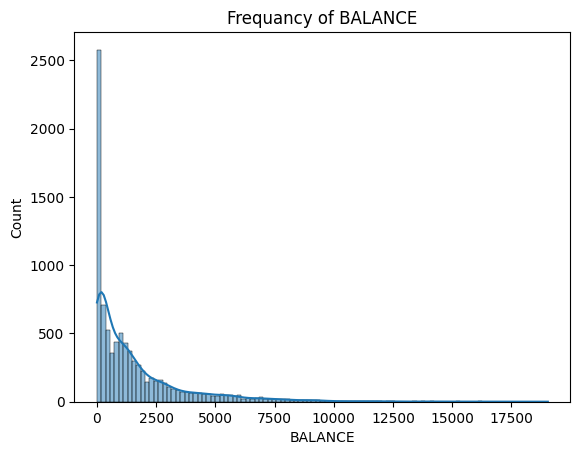

In [13]:
sns.histplot(data=df, x='BALANCE', kde=True)
plt.title('Frequancy of BALANCE');

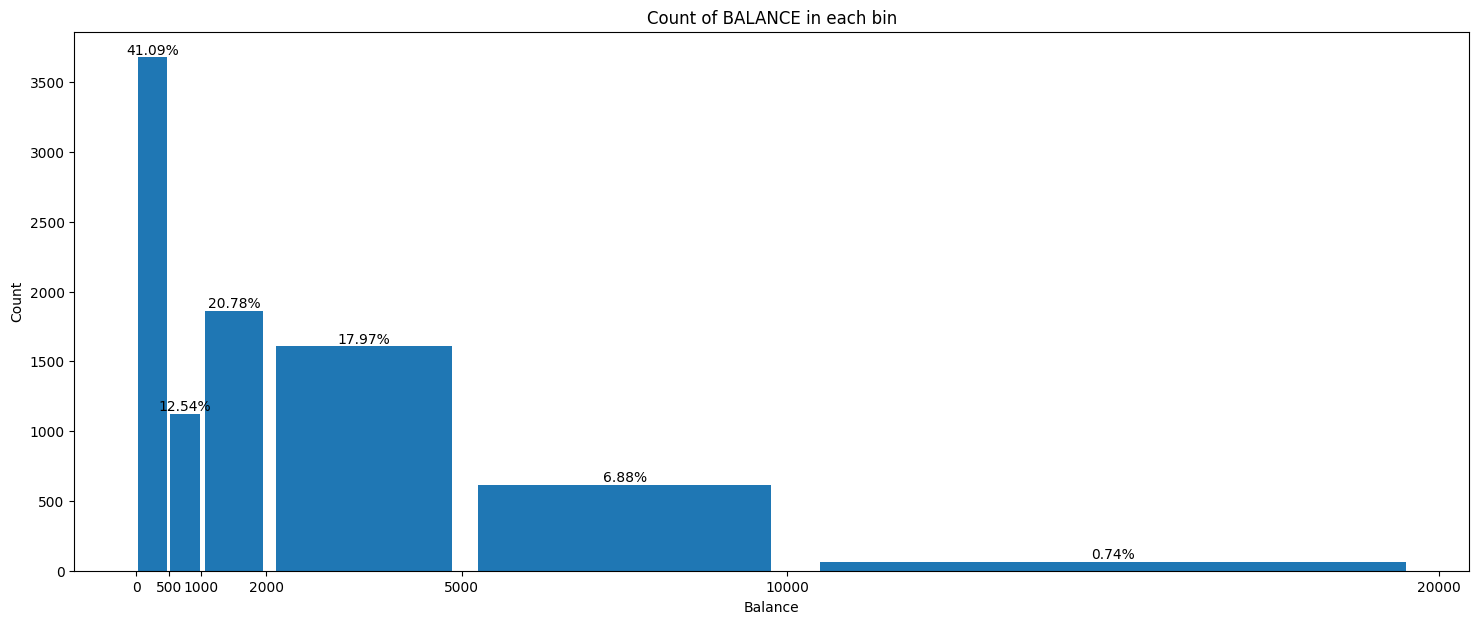

In [14]:
plt.figure(figsize=(18, 7))

# a histogram returns 3 objects : n (i.e. frequncies), bins, patches
freq, bins, patches = plt.hist(df['BALANCE'], bins=[0, 500, 1000, 2000, 5000, 10000, 20000], rwidth=.9)

bin_centers = np.diff(bins)*0.5 + bins[:-1]

n = 0
for fr, x, patch in zip(freq, bin_centers, patches):
    height = int(freq[n])
    plt.annotate("{}%".format(round(height*100 / df.shape[0], 2)),
               xy = (x, height),             # top left corner of the histogram bar
               xytext = (0,0.2),             # offsetting label position above its bar
               textcoords = "offset points", # Offset (in points) from the *xy* value
               ha = 'center', va = 'bottom'
               )
    n = n+1

plt.xticks([0, 500, 1000, 2000, 5000, 10000, 20000])
plt.xlabel("Balance")
plt.ylabel("Count")
plt.title('Count of BALANCE in each bin');

- Most of users have from balance zero to 500 in thier credit card.
- Few people have balance for 10,000 to 20,000.

**Balance_Frequency**

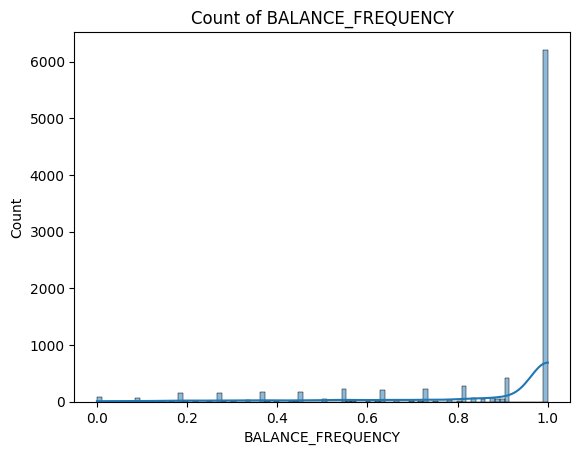

In [15]:
sns.histplot(data=df, x='BALANCE_FREQUENCY', kde=True)
plt.title('Count of BALANCE_FREQUENCY');

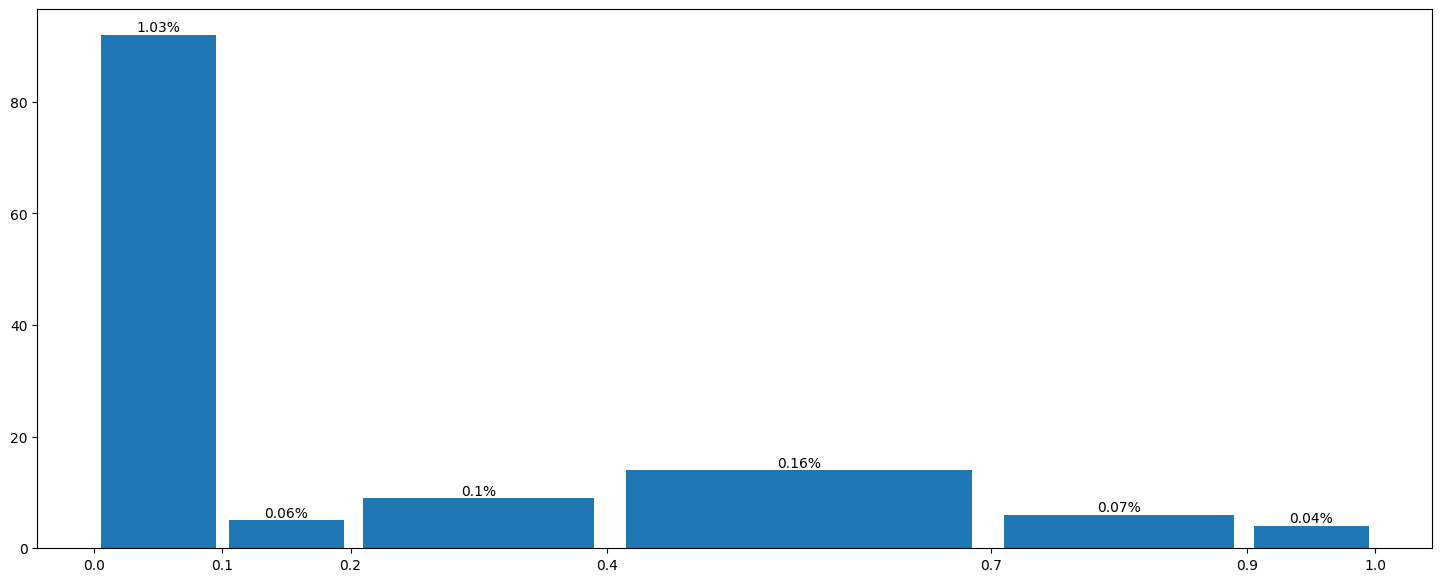

In [16]:
plt.figure(figsize=(18, 7))

freq, bins, patches = plt.hist(df['BALANCE'], bins=[0, .1, .2, .4, .7, .9, 1], rwidth=.9)

bin_centers = np.diff(bins)*0.5 + bins[:-1]

n = 0
for fr, x, patch in zip(freq, bin_centers, patches):
    height = int(freq[n])
    plt.annotate("{}%".format(round(height*100 / df.shape[0], 2)),
               xy = (x, height),
               xytext = (0,0.2),
               textcoords = "offset points",
               ha = 'center', va = 'bottom'
               )
    n = n+1

plt.xticks([0, .1, .2, .4, .7, .9, 1]);

- Most of people doesn't update thier account frequantly.

**Purchases**

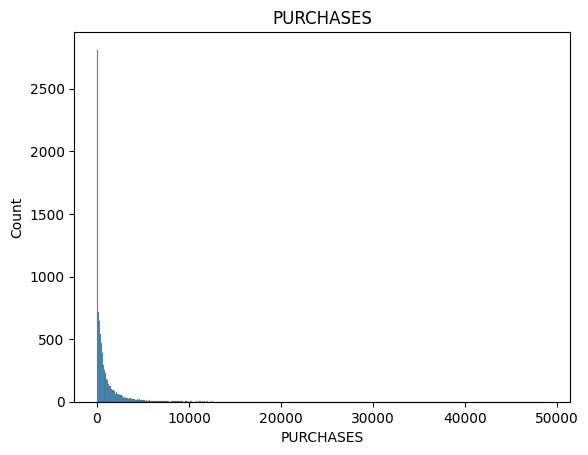

In [17]:
sns.histplot(data=df, x='PURCHASES')
plt.title('PURCHASES');

In [18]:
print(df['PURCHASES'].min())
print(df['PURCHASES'].max())

0.0
49039.57


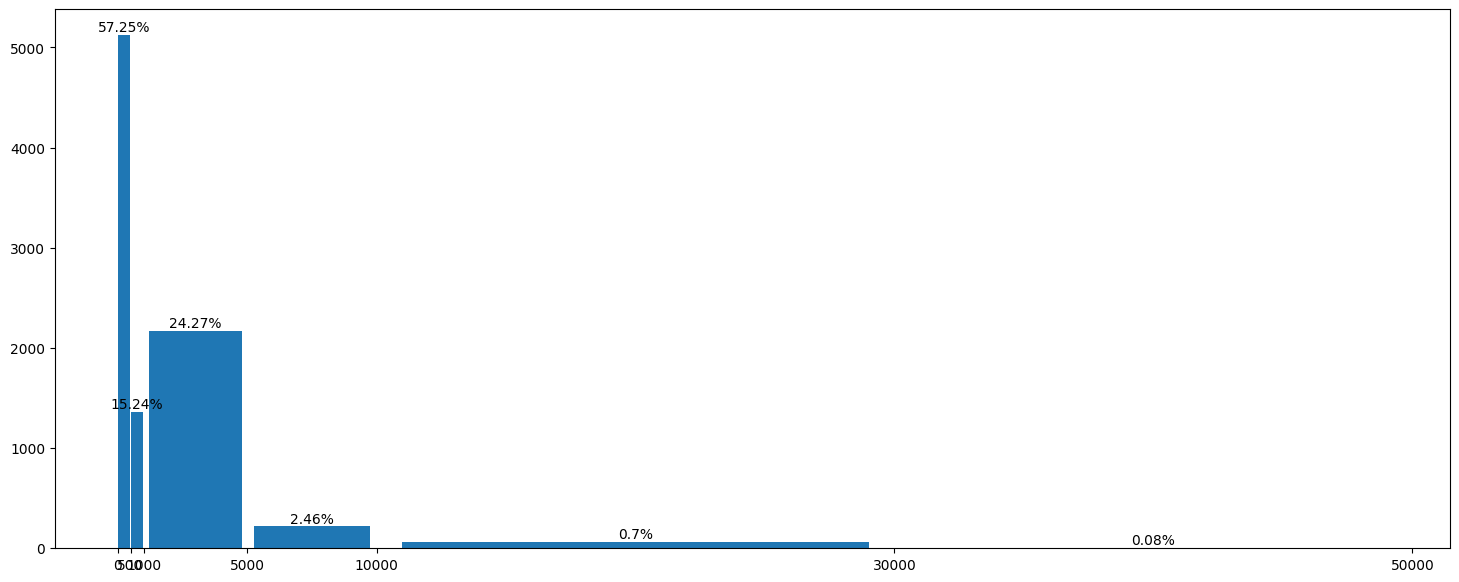

In [19]:
plt.figure(figsize=(18, 7))

freq, bins, patches = plt.hist(df['PURCHASES'], bins=[0, 500, 1000, 5000, 10000, 30000, 50000], rwidth=.9)

bin_centers = np.diff(bins)*0.5 + bins[:-1]

n = 0
for fr, x, patch in zip(freq, bin_centers, patches):
    height = int(freq[n])
    plt.annotate("{}%".format(round(height*100 / df.shape[0], 2)),
               xy = (x, height),
               xytext = (0,0.2),
               textcoords = "offset points",
               ha = 'center', va = 'bottom'
               )
    n = n+1

plt.xticks([0, 500, 1000, 5000, 10000, 30000, 50000]);

- Most of users have from purchases zero to 500 in thier credit card.
- Few people have purchases for 30,000 to 50,000.

**ONEOFF_PURCHASES**

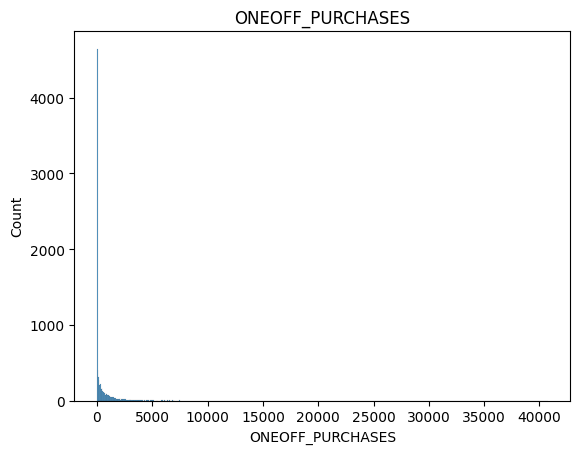

In [20]:
sns.histplot(data=df, x='ONEOFF_PURCHASES')
plt.title('ONEOFF_PURCHASES');

In [21]:
df['ONEOFF_PURCHASES'].min()
df['ONEOFF_PURCHASES'].max()

40761.25

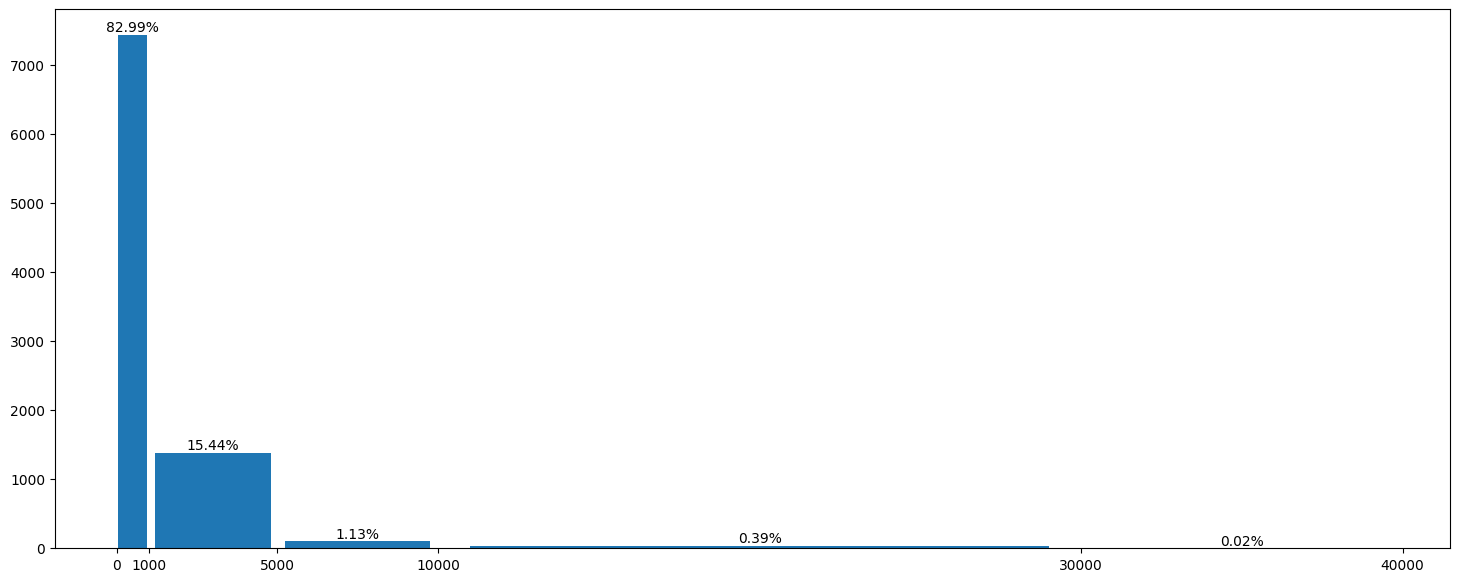

In [22]:
plt.figure(figsize=(18, 7))

freq, bins, patches = plt.hist(df['ONEOFF_PURCHASES'], bins=[0, 1000, 5000, 10000, 30000, 40000], rwidth=.9)

bin_centers = np.diff(bins)*0.5 + bins[:-1]

n = 0
for fr, x, patch in zip(freq, bin_centers, patches):
    height = int(freq[n])
    plt.annotate("{}%".format(round(height*100 / df.shape[0], 2)),
               xy = (x, height),
               xytext = (0,0.2),
               textcoords = "offset points",
               ha = 'center', va = 'bottom'
               )
    n = n+1

plt.xticks([0, 1000, 5000, 10000, 30000, 40000]);

- Nearly **82%** of people has Maximum purchase amount done in one-go more than **7000**

**INSTALLMENTS_PURCHASES**

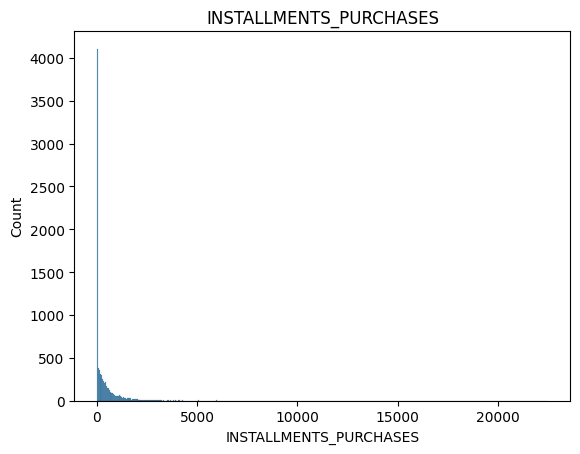

In [23]:
sns.histplot(data=df, x='INSTALLMENTS_PURCHASES')
plt.title('INSTALLMENTS_PURCHASES');

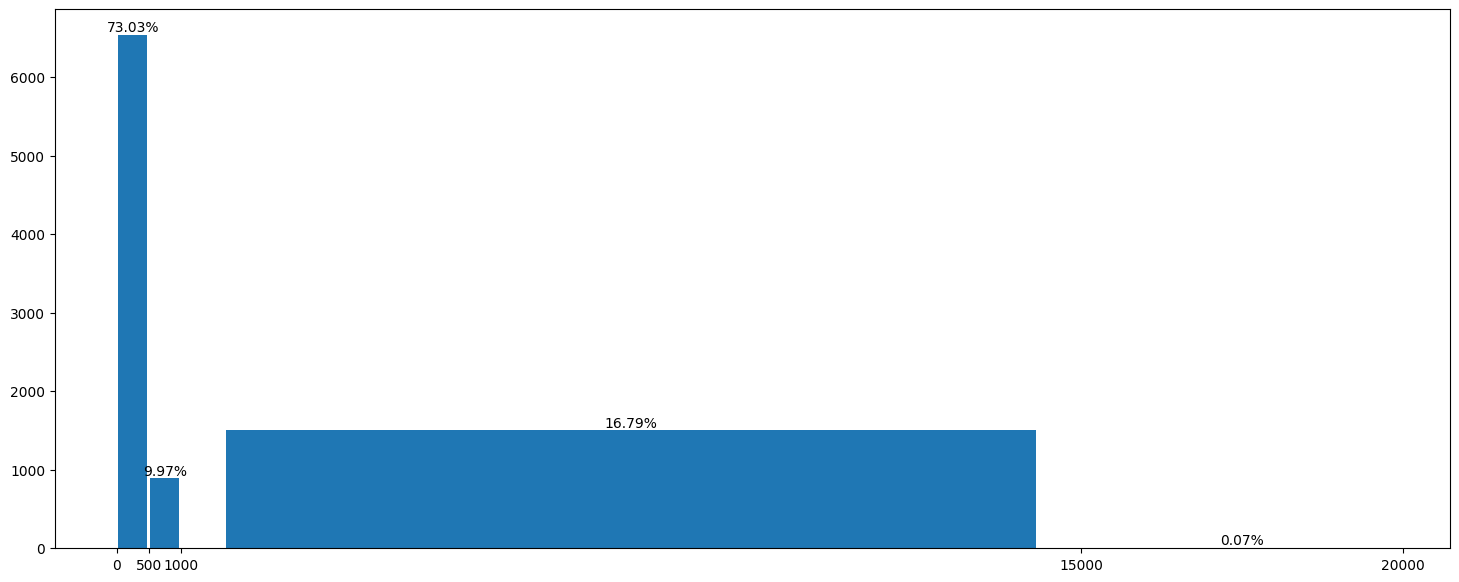

In [24]:
plt.figure(figsize=(18, 7))

freq, bins, patches = plt.hist(df['ONEOFF_PURCHASES'], bins=[0, 500, 1000, 15000, 20000], rwidth=.9)

bin_centers = np.diff(bins)*0.5 + bins[:-1]

n = 0
for fr, x, patch in zip(freq, bin_centers, patches):
    height = int(freq[n])
    plt.annotate("{}%".format(round(height*100 / df.shape[0], 2)),
               xy = (x, height),
               xytext = (0,0.2),
               textcoords = "offset points",
               ha = 'center', va = 'bottom'
               )
    n = n+1

plt.xticks([0, 500, 1000, 15000, 20000]);

- **73%** don't prefer to make purchases installment frequantly.

**CASH_ADVANCE**

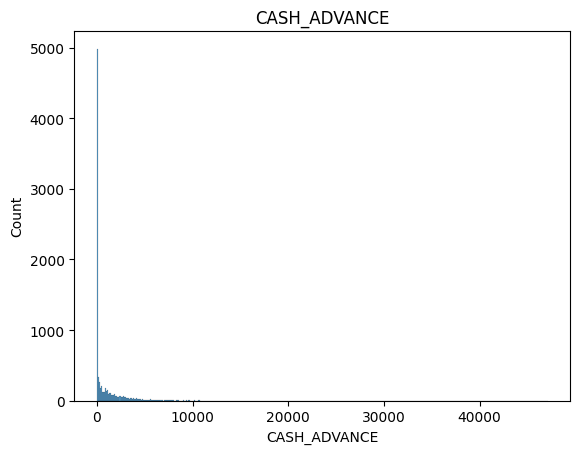

In [25]:
sns.histplot(data=df, x='CASH_ADVANCE')
plt.title('CASH_ADVANCE');

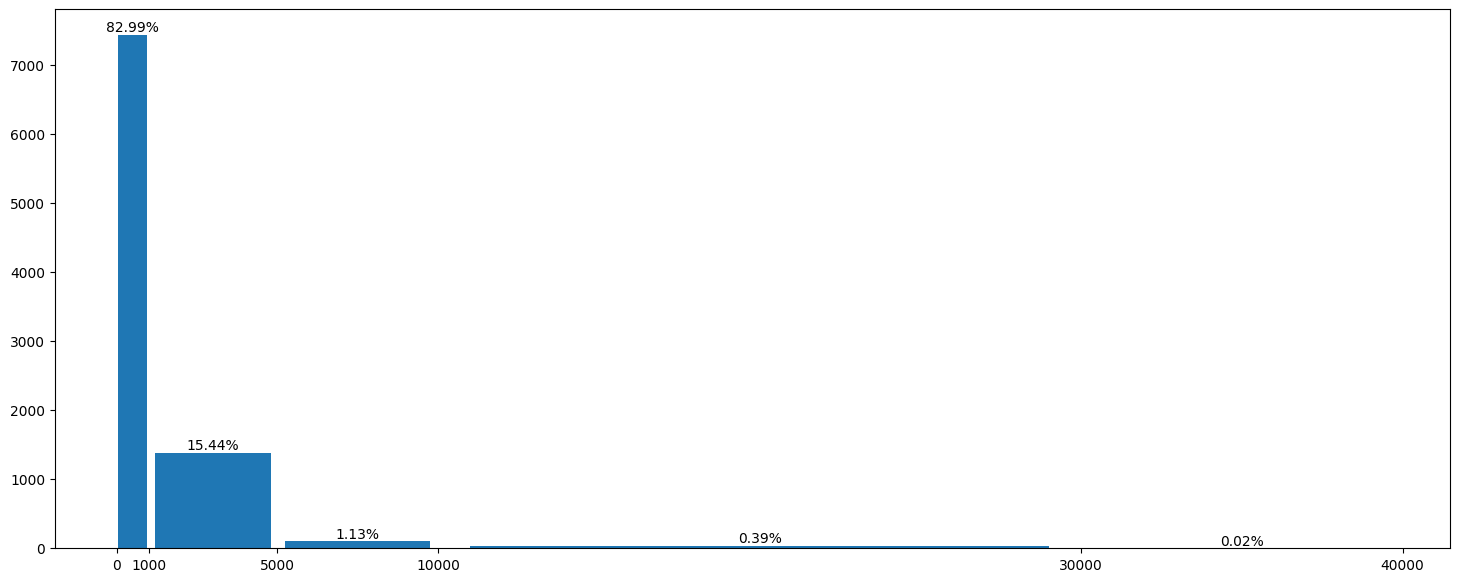

In [26]:
plt.figure(figsize=(18, 7))

freq, bins, patches = plt.hist(df['ONEOFF_PURCHASES'], bins=[0, 1000, 5000, 10000, 30000, 40000], rwidth=.9)

bin_centers = np.diff(bins)*0.5 + bins[:-1]

n = 0
for fr, x, patch in zip(freq, bin_centers, patches):
    height = int(freq[n])
    plt.annotate("{}%".format(round(height*100 / df.shape[0], 2)),
               xy = (x, height),
               xytext = (0,0.2),
               textcoords = "offset points",
               ha = 'center', va = 'bottom'
               )
    n = n+1

plt.xticks([0, 1000, 5000, 10000, 30000, 40000]);

- **95%** of customers don't prefer to pay cash in advance.

**CREDIT_LIMIT**

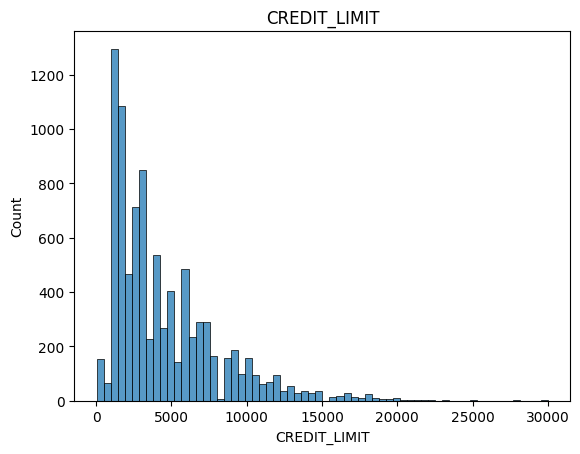

In [27]:
sns.histplot(data=df, x='CREDIT_LIMIT')
plt.title('CREDIT_LIMIT');

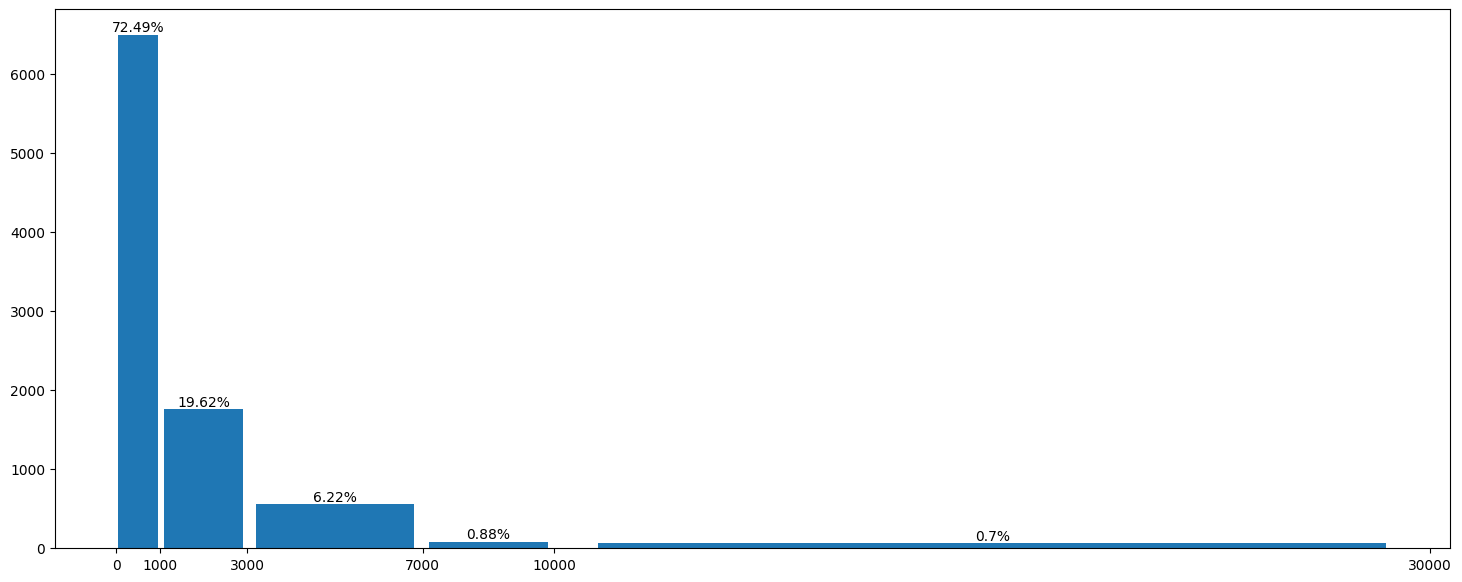

In [28]:
plt.figure(figsize=(18, 7))

freq, bins, patches = plt.hist(df['PURCHASES'], bins=[0, 1000, 3000, 7000, 10000, 30000], rwidth=.9)

bin_centers = np.diff(bins)*0.5 + bins[:-1]

n = 0
for fr, x, patch in zip(freq, bin_centers, patches):
    height = int(freq[n])
    plt.annotate("{}%".format(round(height*100 / df.shape[0], 2)),
               xy = (x, height),
               xytext = (0,0.2),
               textcoords = "offset points",
               ha = 'center', va = 'bottom'
               )
    n = n+1

plt.xticks([0, 1000, 3000, 7000, 10000, 30000]);

- **72% of customers** have credit card limits not exceeding $1000.

**PAYMENTS**

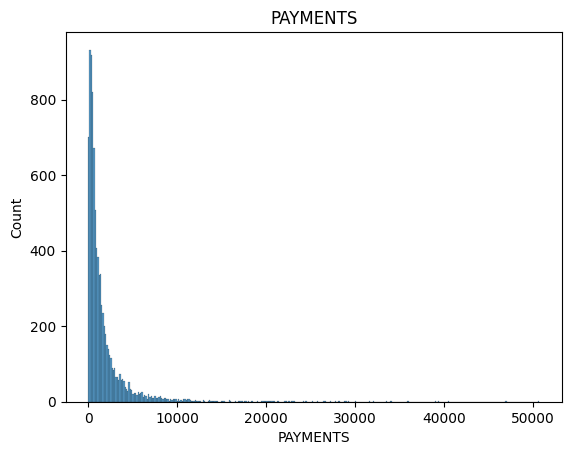

In [29]:
sns.histplot(data=df, x='PAYMENTS')
plt.title('PAYMENTS');

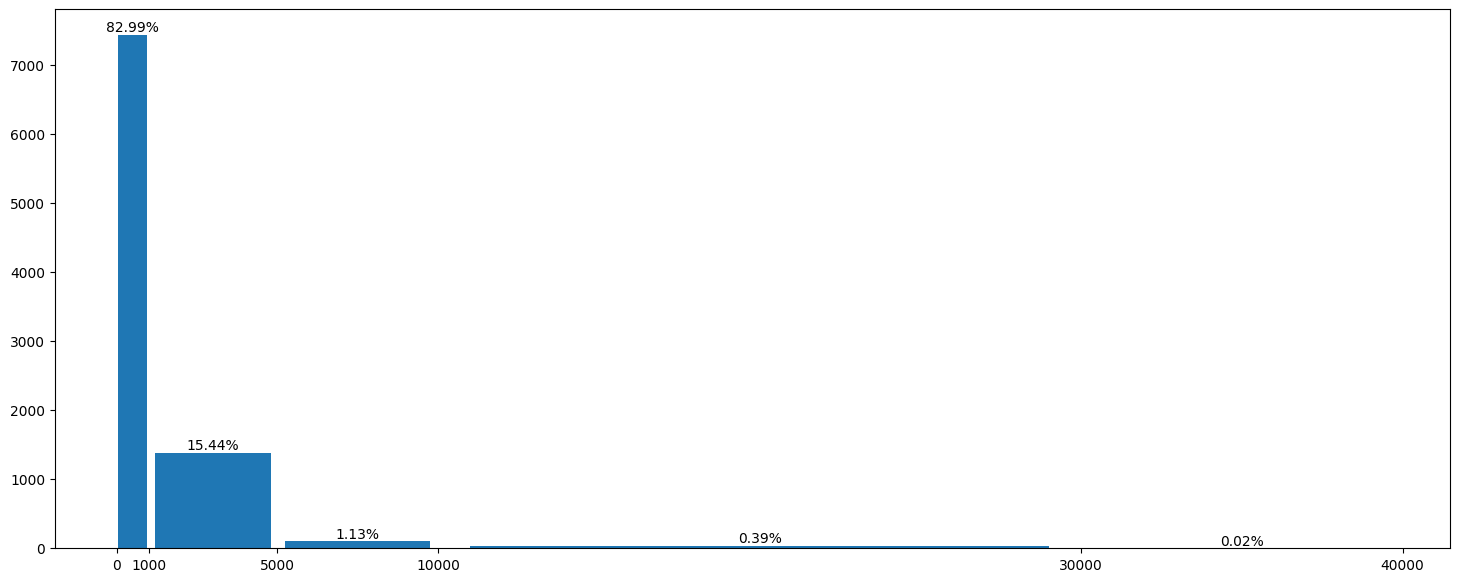

In [30]:
plt.figure(figsize=(18, 7))

freq, bins, patches = plt.hist(df['ONEOFF_PURCHASES'], bins=[0, 1000, 5000, 10000, 30000, 40000], rwidth=.9)

bin_centers = np.diff(bins)*0.5 + bins[:-1]

n = 0
for fr, x, patch in zip(freq, bin_centers, patches):
    height = int(freq[n])
    plt.annotate("{}%".format(round(height*100 / df.shape[0], 2)),
               xy = (x, height),
               xytext = (0,0.2),
               textcoords = "offset points",
               ha = 'center', va = 'bottom'
               )
    n = n+1

plt.xticks([0, 1000, 5000, 10000, 30000, 40000]);

- **82%** of customers pay from 0 to 1000 and a few no of customers pay from 30,000 to 40,000.

**Tenure**

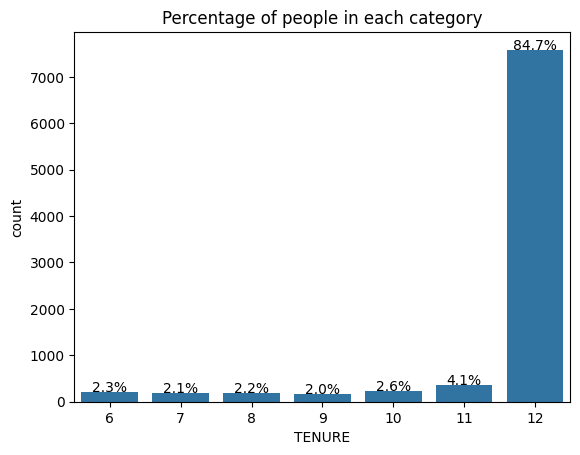

In [31]:
ax = sns.countplot(data=df, x='TENURE')

total = len(df['TENURE'])
percentage_dict = (df['TENURE'].value_counts() / total) * 100

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1,
            f'{height/total*100:.1f}%',
            ha="center")

plt.title('Percentage of people in each category');

- **84%** of customers use credit card of Tenure with 12 months.

<Axes: xlabel='PURCHASES', ylabel='PAYMENTS'>

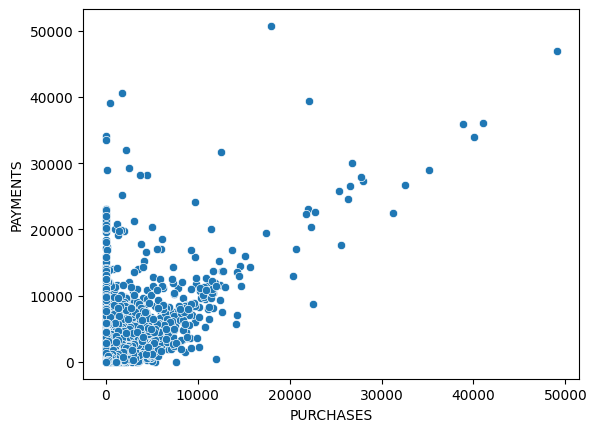

In [32]:
sns.scatterplot(data=df, x='PURCHASES', y='PAYMENTS')

- There is approximately linear correlation.

<Axes: >

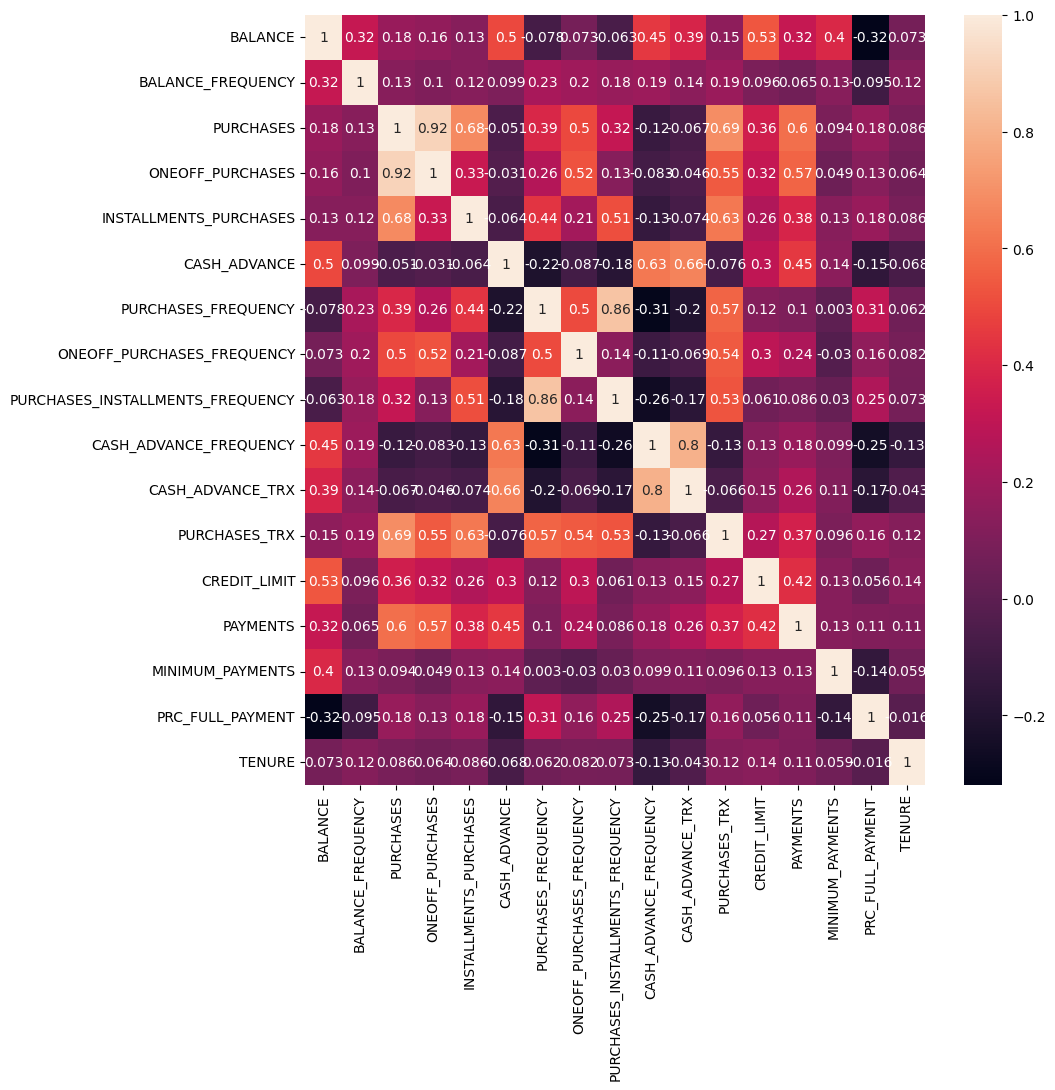

In [33]:
plt.figure(figsize=(10, 10))

sns.heatmap(df.corr(), annot=True)

- There is a **strong correlation** between **PURCHASES** and **ONEOFF_PURCHASES** by 92%.
- There is a **strong correlation** between **CASH_ADVANCE_FREQUENCY** and **CASH_ADVANCE_TRX** by 80%.

## 3. <a name="3">Data preprocessing</a>
(<a href="#0">Go to top</a>)


### Define below all the issues that you had found in the previous part
1-  Null Values         <br>
2-  Outliers         <br>
3-           <br>

In [11]:
#make a copy for the original dataset
df_copy=df.copy()

### for each issue adapt this methodology
- start by defining the solution
- apply this solution onn the data
- test the solution to make sure that you have solved the issue

**First issue**
- Null Values

In [12]:
#solution
df_copy['MINIMUM_PAYMENTS'].fillna(df_copy['MINIMUM_PAYMENTS'].median(), inplace=True)
df_copy.dropna(inplace=True)

In [13]:
#test
df_copy.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

**Second Issue**
- Skewness

In [14]:
data = np.log(df_copy+1)

In [15]:
data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,3.735304,0.597837,4.568506,0.000000,4.568506,0.000000,0.154151,0.000000,0.080042,0.000000,0.000000,1.098612,6.908755,5.312231,4.945277,0.000000,2.564949
1,8.071989,0.646627,0.000000,0.000000,0.000000,8.770896,0.000000,0.000000,0.000000,0.223144,1.609438,0.000000,8.853808,8.319725,6.978531,0.200671,2.564949
2,7.822504,0.693147,6.651791,6.651791,0.000000,0.000000,0.693147,0.693147,0.000000,0.000000,0.000000,2.564949,8.922792,6.434654,6.442994,0.000000,2.564949
3,7.419183,0.492477,7.313220,7.313220,0.000000,5.331694,0.080042,0.080042,0.000000,0.080042,0.693147,0.693147,8.922792,0.000000,5.747301,0.000000,2.564949
4,6.707735,0.693147,2.833213,2.833213,0.000000,0.000000,0.080042,0.080042,0.000000,0.000000,0.000000,0.693147,7.090910,6.521114,5.504483,0.000000,2.564949


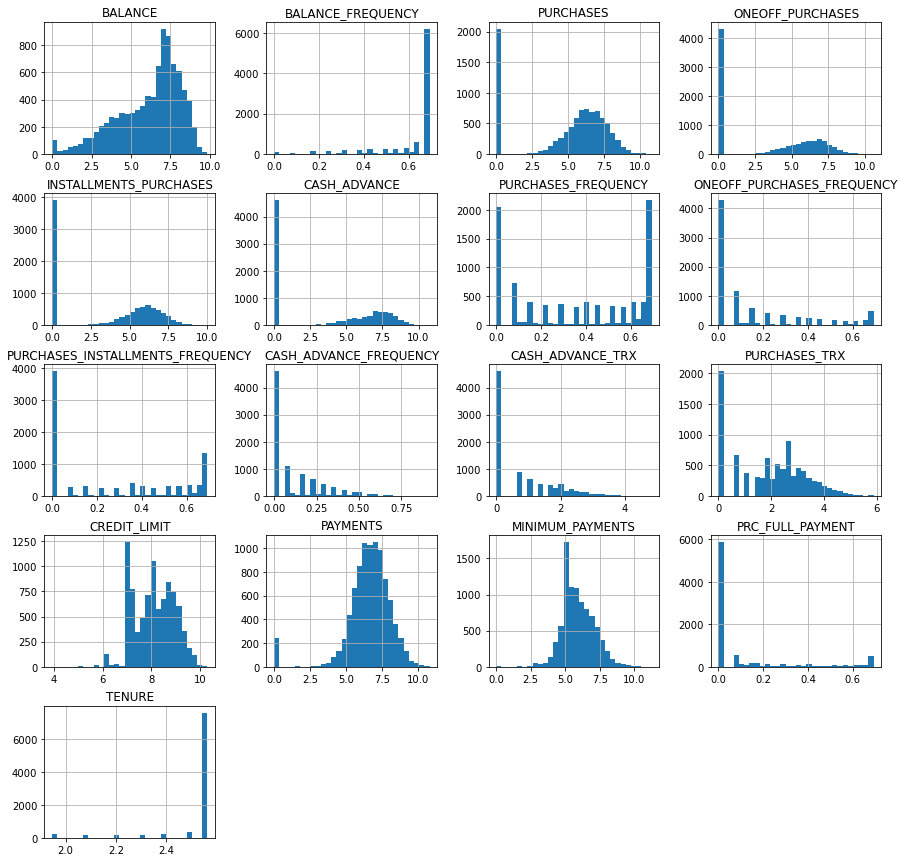

In [19]:
pd.DataFrame(data).hist(bins=30, figsize=(15, 15))
plt.show()

## 4. <a name="4">Features transformation</a>
(<a href="#0">Go to top</a>)

*What is the feature scaling technique that would use and why?* <br>
*return to this section again and try another technique and see how that will impact your result*<br>
for more details on different methods for scaling check these links
- https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing
- https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
- https://www.analyticsvidhya.com/blog/2020/07/types-of-feature-transformation-and-scaling/

Answer here:

In [39]:
# scaler = StandardScaler()

In [40]:
# df_scaled = scaler.fit_transform(df_copy)

**Dimensionality Reduction**

In [41]:
pca = PCA(n_components=.9)

In [42]:
pca_data = pca.fit_transform(data)

In [43]:
pca_data

array([[ 1.01120602, -5.61013924,  0.7534094 ,  0.31665242],
       [-8.97028956,  1.5353381 ,  0.98168732, -1.26624584],
       [ 2.61754371,  1.32807373, -4.97962368, -2.42211851],
       ...,
       [ 1.66200868, -5.9793363 ,  0.98557414,  1.33478104],
       [-5.67526974, -5.42426045, -2.23308735,  2.5393813 ],
       [ 0.53069276,  2.75748113, -4.18344673,  3.09232123]])

In [44]:
pca_data.shape

(8949, 4)

In [45]:
pca_data = pd.DataFrame(data=pca_data, columns=["PCA1", "PCA2", "PCA3", "PCA4"])

In [46]:
pca_data.head()

,PCA1,PCA2,PCA3,PCA4
0,1.011206,-5.610139,0.753409,0.316652
1,-8.970290,1.535338,0.981687,-1.266246
2,2.617544,1.328074,-4.979624,-2.422119
3,-0.308681,2.979228,-4.671383,3.203932
4,-1.233563,-2.718457,-3.713409,-2.563108


**Apply T-SNE before any algorithm**

In [52]:
t_sne = TSNE(n_components=2,  perplexity=30, learning_rate=0.1, n_iter=2000)

In [53]:
tsne_features = t_sne.fit_transform(pca_data)

In [54]:
tsne_data = pd.DataFrame(data=tsne_features, columns=['x', 'y'])

In [55]:
tsne_data.head()

,x,y
0,-1.340253,-5.474072
1,-6.990019,3.675562
2,0.689000,2.380037
3,-1.384952,4.059319
4,-1.313899,-1.110445


<Axes: xlabel='x', ylabel='y'>

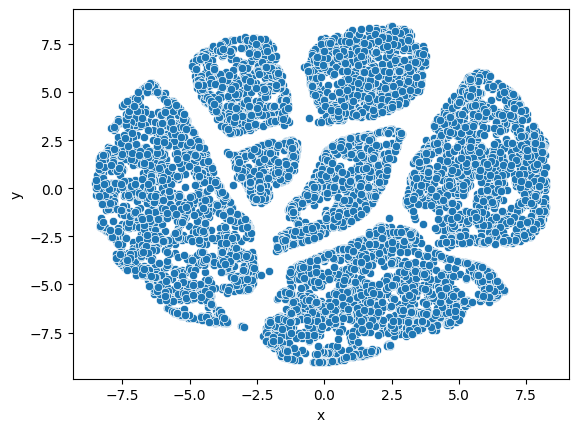

In [56]:
sns.scatterplot(data=tsne_data, x='x', y='y')

## 5. <a name="5">K Means</a>
(<a href="#5">Go to top</a>)

1- Use the k means class that you implemented in the previous task to cluster this data
2- Use http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html and see if the difference in the result
3- Use elbow method to determine the K (plot the result using two plot one for distorion and another for inertia)
4- (Optionally) make a method that pick the best number of clusters for you
5- Using different techniques for scaling and comment on the result

In [57]:
inertia = []
no_of_cluster = range(1, 15)

In [58]:
for i in no_of_cluster:
    k_means = KMeans(n_clusters=i, random_state=42)
    k_means.fit_predict(pd.DataFrame(pca_data))
    inertia.append(k_means.inertia_)

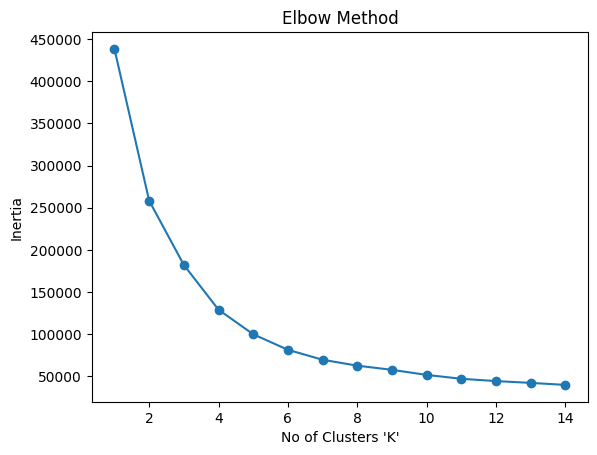

In [59]:
plt.plot(no_of_cluster, inertia, 'o-')
plt.xlabel("No of Clusters 'K'")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

- **Note:** We can choose no. of clusters = 7




In [60]:
k_means = KMeans(n_clusters=7, random_state=42)

In [61]:
k_means.fit(pca_data)

KMeans(n_clusters=7, random_state=42)

**T-SNE For K-Means:**

In [74]:
tsne = TSNE(learning_rate=200, n_components=2)

In [75]:
x_tsne = tsne.fit_transform(pca_data)

In [76]:
pd.DataFrame(x_tsne)

,0,1
0,-1.127970,-55.846626
1,-68.877800,23.413595
2,15.432518,5.280120
3,-23.017637,60.338989
4,19.129751,-20.326200
...,...,...
8944,4.271721,-76.432381
8945,8.364877,-74.242966
8946,-8.927922,-64.734322
8947,-43.106262,-52.616505


**T-SNE after K-means**

In [77]:
y = k_means.labels_
y

array([1, 6, 2, ..., 1, 6, 0], dtype=int32)

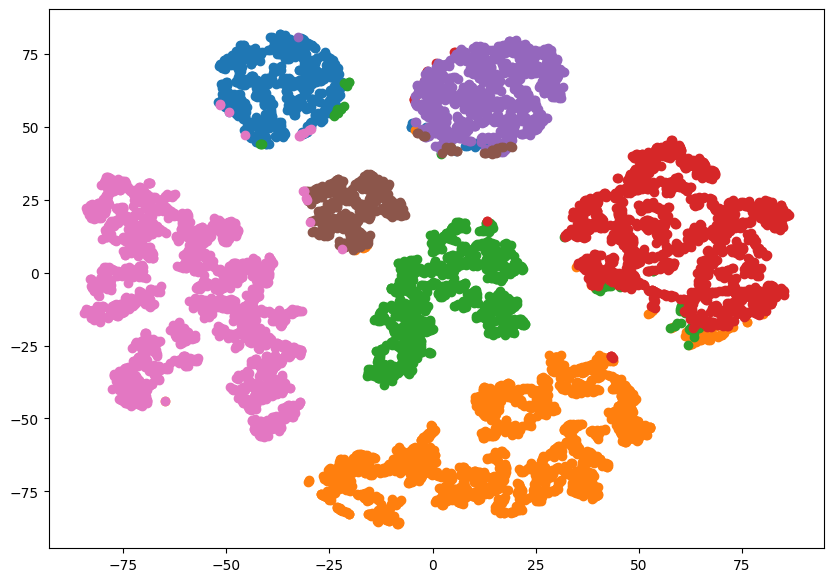

In [78]:
plt.figure(figsize=(10, 7))

plt.scatter(x_tsne[np.where(y==0), 0], x_tsne[np.where(y==0), 1])
plt.scatter(x_tsne[np.where(y==1), 0], x_tsne[np.where(y==1), 1])
plt.scatter(x_tsne[np.where(y==2), 0], x_tsne[np.where(y==2), 1])
plt.scatter(x_tsne[np.where(y==3), 0], x_tsne[np.where(y==3), 1])
plt.scatter(x_tsne[np.where(y==4), 0], x_tsne[np.where(y==4), 1])
plt.scatter(x_tsne[np.where(y==5), 0], x_tsne[np.where(y==5), 1])
plt.scatter(x_tsne[np.where(y==6), 0], x_tsne[np.where(y==6), 1])

#### K-means that I have implemented:

In [91]:
class K_means():
    def __init__(self, k=3):
        self.k = k
        self.centroids = None

    def fit(self, X, max_iterations=100):
        m = X.shape[0]
        n = X.shape[1]


        # random initializtion for centroids
        random_indices = np.random.choice(X.shape[0], size=self.k, replace=False)
        self.centroids = X[random_indices]

        # k-means training
        distances = np.zeros((m, self.k))
        idx = np.zeros((m, 1))
        centroids = np.zeros((self.k, n))

        for i in range(max_iterations):
            for j in range(self.k):
                distances[:, j] = np.sum((X - self.centroids[j]) ** 2, axis=1)

            idx = np.argmin(distances, axis=1)

            for i in range(self.k):
                self.centroids[i, :] = np.mean(X[idx==i], axis=0)

        return self.centroids, idx

    def predict(self, X):
        m = X.shape[0]
        distances = np.zeros((m, self.k))

        for i in range(self.k):
            distances[:, i] = np.sum((X - self.centroids[i])**2, axis=1)

        label = np.argmin(distances, axis=1)

        return label

In [92]:
k_means_model = K_means(k=7)

In [95]:
k_means_model.fit(pca_data.values)

(array([[ 2.46487239e+00, -4.67644582e+00,  1.93479580e+00,
          6.47560512e-03],
        [ 7.84718141e-02,  5.30829710e+00,  3.43314287e-01,
          1.40869087e+00],
        [ 1.92201203e+00, -5.74146794e-01, -5.03529793e+00,
         -3.81969820e-01],
        [-1.66681706e+00,  1.31238858e+00,  4.98867626e+00,
          6.29593952e-01],
        [-6.93344808e+00, -2.05587569e+00, -8.86214027e-01,
          4.74529431e-01],
        [ 6.20800553e+00,  9.29016746e-01, -2.25988459e-01,
         -7.06039879e-01],
        [-8.27656642e+00,  4.82516474e-01,  3.87339261e-01,
         -1.06259800e+00]]),
 array([0, 6, 2, ..., 0, 4, 2]))

**T-SNE For K-Means:**

In [99]:
y = k_means_model.predict(pca_data.values)

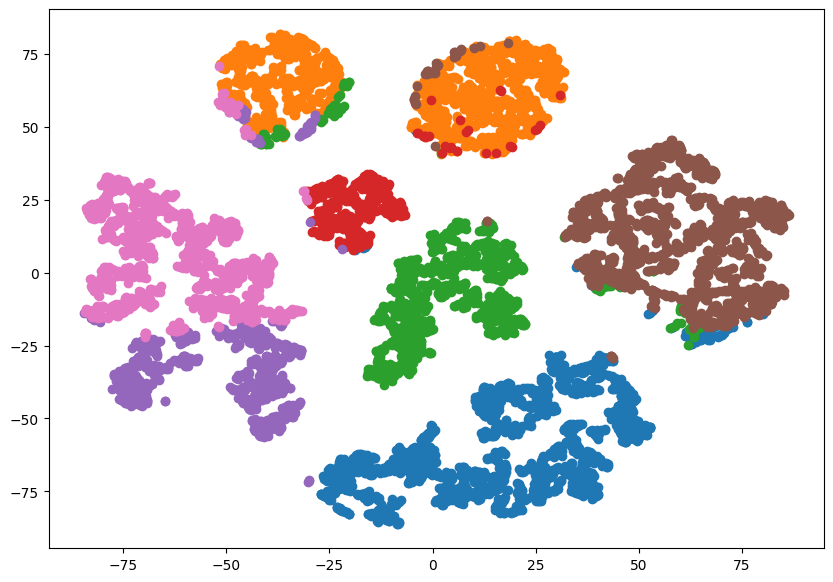

In [100]:
plt.figure(figsize=(10, 7))

plt.scatter(x_tsne[np.where(y==0), 0], x_tsne[np.where(y==0), 1])
plt.scatter(x_tsne[np.where(y==1), 0], x_tsne[np.where(y==1), 1])
plt.scatter(x_tsne[np.where(y==2), 0], x_tsne[np.where(y==2), 1])
plt.scatter(x_tsne[np.where(y==3), 0], x_tsne[np.where(y==3), 1])
plt.scatter(x_tsne[np.where(y==4), 0], x_tsne[np.where(y==4), 1])
plt.scatter(x_tsne[np.where(y==5), 0], x_tsne[np.where(y==5), 1])
plt.scatter(x_tsne[np.where(y==6), 0], x_tsne[np.where(y==6), 1])

## 6. <a name="5">Training and hyperparamter tuning</a>
(<a href="#0">Go to top</a>)


Before we start the training process we need to specify 3 paramters:<br>
1- Linkage criteria : The linkage criterion determines the distance between two clusters
    - Complete-Linkage Clustering
    - Single-Linkage Clustering
    - Average-Linkage Clustering
    - Centroid Linkage Clustering
2- Distance function:
    - Euclidean Distance
    - Manhattan Distance
    - Mahalanobis distance
3- Number of clusters


### *Number of clusters*
Use Dendograms to specify the optimum number of clusters
- Compare how changing linkage criteria or distance function would affect the optimum number of clusters
- you can use silhouette_score or any other evalution method to help you determine the optimum number of clusters
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

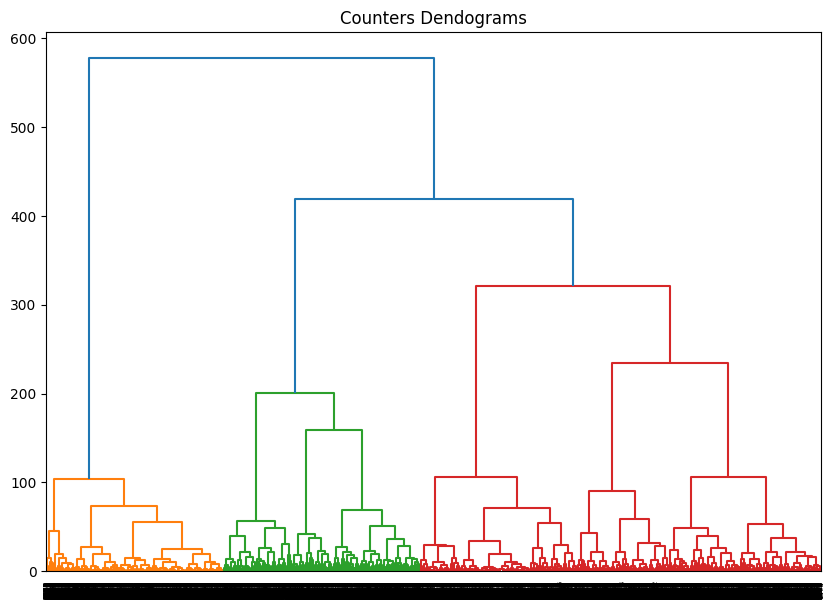

In [79]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Counters Dendograms")
dend = shc.dendrogram(shc.linkage(y=pca_data , method='ward' ,metric='euclidean'), orientation='top')
#fill y with your dataframe
#and method with linkage criteria
#and metric with distance function

In [80]:
#training
from sklearn.cluster import AgglomerativeClustering

# no of clusters
n_clusters = 7

# training AgglomerativeClustering Model
hier_model = AgglomerativeClustering(n_clusters=n_clusters)
hier_model.fit(pca_data)

AgglomerativeClustering(n_clusters=7)

**T-SNE after AgglomerativeClustering**

In [81]:
y = hier_model.labels_
y

array([0, 1, 4, ..., 0, 1, 5])

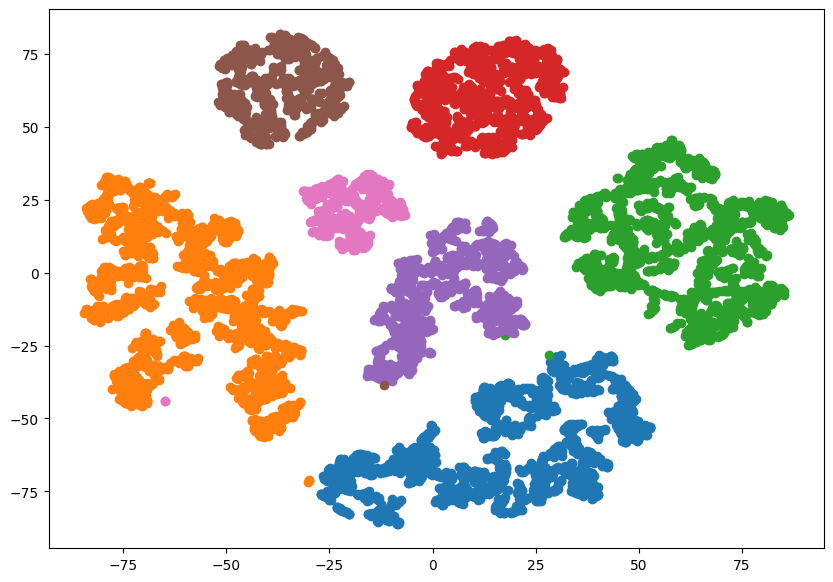

In [82]:
plt.figure(figsize=(10, 7))

plt.scatter(x_tsne[np.where(y==0), 0], x_tsne[np.where(y==0), 1])
plt.scatter(x_tsne[np.where(y==1), 0], x_tsne[np.where(y==1), 1])
plt.scatter(x_tsne[np.where(y==2), 0], x_tsne[np.where(y==2), 1])
plt.scatter(x_tsne[np.where(y==3), 0], x_tsne[np.where(y==3), 1])
plt.scatter(x_tsne[np.where(y==4), 0], x_tsne[np.where(y==4), 1])
plt.scatter(x_tsne[np.where(y==5), 0], x_tsne[np.where(y==5), 1])
plt.scatter(x_tsne[np.where(y==6), 0], x_tsne[np.where(y==6), 1])

## 6. <a name="6">DBSCAN</a>

In [83]:
dbscan = DBSCAN(eps=2.5, min_samples=5).fit(pca_data)

**T-SNE after AgglomerativeClustering**

In [84]:
y = dbscan.labels_
y

array([0, 1, 0, ..., 0, 1, 1])

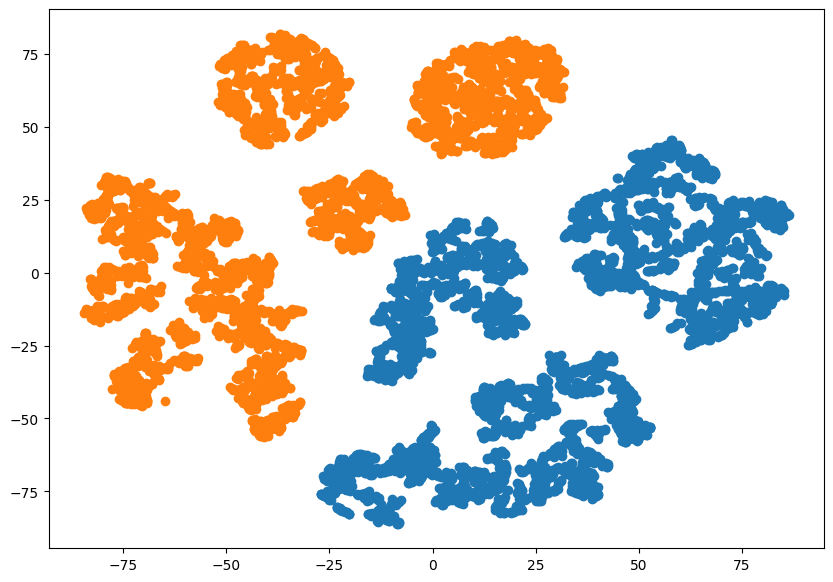

In [85]:
plt.figure(figsize=(10, 7))

plt.scatter(x_tsne[np.where(y==0), 0], x_tsne[np.where(y==0), 1])
plt.scatter(x_tsne[np.where(y==1), 0], x_tsne[np.where(y==1), 1])
plt.scatter(x_tsne[np.where(y==2), 0], x_tsne[np.where(y==2), 1])
plt.scatter(x_tsne[np.where(y==3), 0], x_tsne[np.where(y==3), 1])
plt.scatter(x_tsne[np.where(y==4), 0], x_tsne[np.where(y==4), 1])
plt.scatter(x_tsne[np.where(y==5), 0], x_tsne[np.where(y==5), 1])
plt.scatter(x_tsne[np.where(y==6), 0], x_tsne[np.where(y==6), 1])

## 7. <a name="6">GaussianMixture</a>

In [86]:
# Number of clusters (K)
n_clusters = 7

In [87]:
# Initialize the GaussianMixture model
gaussian_model = GaussianMixture(n_components=n_clusters, covariance_type='full')

In [88]:
labels_ = gaussian_model.fit_predict(pca_data)

**T-SNE after GaussianMixture**

In [89]:
y = labels_
y

array([2, 1, 0, ..., 2, 1, 3])

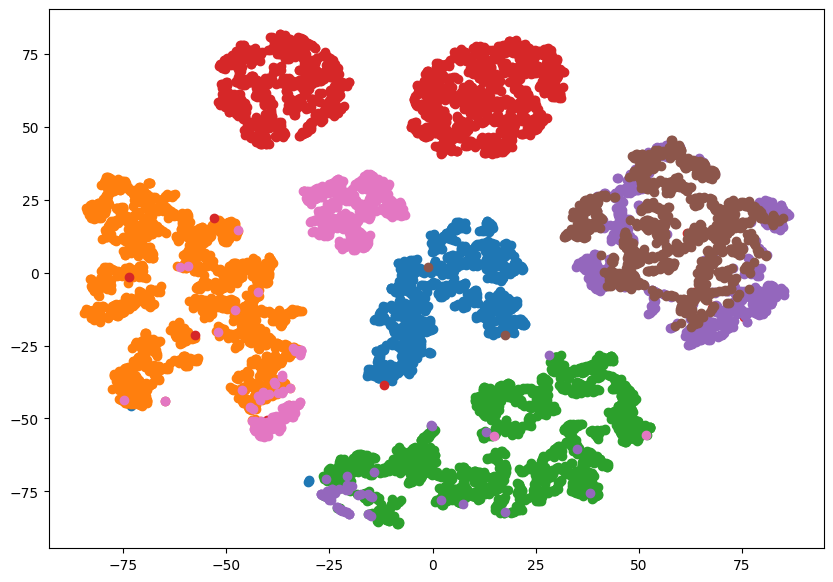

In [90]:
plt.figure(figsize=(10, 7))

plt.scatter(x_tsne[np.where(y==0), 0], x_tsne[np.where(y==0), 1])
plt.scatter(x_tsne[np.where(y==1), 0], x_tsne[np.where(y==1), 1])
plt.scatter(x_tsne[np.where(y==2), 0], x_tsne[np.where(y==2), 1])
plt.scatter(x_tsne[np.where(y==3), 0], x_tsne[np.where(y==3), 1])
plt.scatter(x_tsne[np.where(y==4), 0], x_tsne[np.where(y==4), 1])
plt.scatter(x_tsne[np.where(y==5), 0], x_tsne[np.where(y==5), 1])
plt.scatter(x_tsne[np.where(y==6), 0], x_tsne[np.where(y==6), 1])

### Final Results:

- **Hierarichal Model** is the best model between the model that I have used.

In [108]:
final_data = df_copy.copy()
final_data['Cluster'] = hier_model.labels_

In [109]:
cols = ['PURCHASES', 'ONEOFF_PURCHASES' ,'PURCHASES_FREQUENCY','PAYMENTS', 'CASH_ADVANCE','CREDIT_LIMIT' ,'INSTALLMENTS_PURCHASES', 'PURCHASES_TRX',
        'CASH_ADVANCE_TRX', 'CASH_ADVANCE_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
        'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'TENURE']

In [110]:
final_data.groupby('Cluster')[cols].mean()

,PURCHASES,ONEOFF_PURCHASES,PURCHASES_FREQUENCY,PAYMENTS,CASH_ADVANCE,CREDIT_LIMIT,INSTALLMENTS_PURCHASES,PURCHASES_TRX,CASH_ADVANCE_TRX,CASH_ADVANCE_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,TENURE
Cluster,,,,,,,,,,,,,,
0,537.525208,0.000799,0.705781,748.746493,0.000000,3122.747301,538.531658,11.814199,0.000000,0.000000,0.000231,0.672141,0.000000,11.509151
1,0.003134,0.003134,0.000653,1651.815643,1989.401652,4028.395062,0.000000,0.006823,6.287037,0.272026,0.000491,0.000162,0.272026,11.323587
2,2468.535434,1510.567163,0.811747,2279.567659,0.000000,5701.142590,957.996239,34.478881,0.000000,0.000000,0.460426,0.646021,0.000000,11.803082
3,1935.864363,1165.345291,0.778365,3018.805870,2086.496215,5808.007020,770.822300,30.503455,7.742349,0.291748,0.397193,0.628635,0.291748,11.615005
4,884.273255,884.359298,0.356374,1204.847217,0.000000,4424.799444,0.001824,7.758653,0.000000,0.000000,0.356062,0.000078,0.000000,11.556595
5,666.517371,666.561044,0.277465,1922.247085,2024.383898,4640.911378,0.000000,6.330818,6.864151,0.294288,0.277360,0.000000,0.294288,11.347170
6,534.289849,0.004366,0.650667,1944.283477,2054.734514,4371.397849,535.115032,12.266667,6.182796,0.261668,0.000896,0.603850,0.261668,11.326882


## Cluster 0:

**Customer Behaviour:** 
- These customers prefer to purchase installments frequently.

## Cluster 1:

**Customer Behaviour:** 
- These customers prefer to do cash in advance and low in installments purchases.

## Cluster 2:

**Customer Behaviour:** 
- This is the most group doing purchases but don't prefer doing purchases in advance.

## Cluster 3:

**Customer Behaviour:** 
- These customers are doing purchases frequantly and in the same time, They prefer doing purchases in advance.

## Cluster 4:

**Customer Behaviour:**
- This group is in the middle. They are doing purchases and payment and low in cash in advance. 

## Cluster 5:

**Customer Behaviour:**
- This group is in the middle. They are doing purchases and payment and low in installment purchases frequancy. 

## Cluster 6:

**Customer Behaviour:** 
- This group is doing a lot of purchases in advance and high in one off purchases.

## Cluster 7:

**Customer Behaviour:** 
- This group is doing purchases in advance frequantly, and have a lot of payment.

## 8. <a name="6">improvement ideas</a>
(<a href="#0">Go to top</a>)

- Try to use PCA to reduce the number of features and compare how this will affect the clustring process
- Try to run your code again but with different tranformation technique
- Implement gap statistics method and use it as evaluation metric and compare the result with what you did before https://www.datanovia.com/en/lessons/determining-the-optimal-number-of-clusters-3-must-know-methods/#gap-statistic-method